In [71]:
#gestion des dataframes
import pandas as pd
import numpy as np

#gestion des graphiques
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t, shapiro
from scipy import stats


from sklearn import metrics,cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [72]:
df = pd.read_csv('billets.csv',sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Les variables des données :
- $is$_$genuine$: si le bittet est authentique
- $diagonal$ : la diagonale du billet (en mm)
- $height$_$left$ : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
- $height$_$right$ : La hauteur du billet (mesurée sur le côté droit, en mm) ;
- $margin$_$low$ : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) 
- $margin$_$up$ : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) 
- $length$ : la longueur du billet (en mm) 

In [73]:
df.shape

(1500, 7)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [75]:
df['is_genuine'].replace([False,True], [0,1], inplace=True)
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [76]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


l'ecart type des variables length et margin_low sont plus important que les autres variables.

In [77]:
df.duplicated().sum()

0

In [78]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [79]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()
outliers

is_genuine       0
diagonal         7
height_left      6
height_right    11
margin_low      24
margin_up        3
length           3
dtype: int64

In [80]:
# dataframe avec les valeurs manquantes
margin_fail=df.loc[df['margin_low'].isnull(),['is_genuine','diagonal','height_left','height_right','margin_up','length']]
margin_fail.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length
72,1,171.94,103.89,103.45,3.25,112.79
99,1,171.93,104.07,104.18,3.14,113.08
151,1,172.07,103.80,104.38,3.02,112.93
197,1,171.45,103.66,103.80,3.62,113.27
241,1,171.83,104.14,104.06,3.02,112.36


In [81]:
margin_fail.shape

(37, 6)

In [82]:
# dataframe sans les valeurs manquantes
data=df.dropna()
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [83]:
data.shape

(1463, 7)

## sélection régressive
On utilse "backward selection" (sélection régressive) est pour sélectionner un modèle de régression optimal en commençant par un modèle complet qui inclut toutes les variables explicatives disponibles, puis en éliminant progressivement les variables qui ne sont pas significatives ou qui n'apportent pas de valeur prédictive au modèle.

In [84]:


# Creation de X et y:
X = data.drop("margin_low", axis=1)
y = data["margin_low"]

# Ajoutez une constante (interception) au modèle
X = sm.add_constant(X)

# Ajustez le modèle initial avec toutes les variables
model = sm.OLS(y, X).fit()

# Fonction pour effectuer la backward selection
def backward_selection(X, y, model):
    while True:
        # Calcul des valeurs p des coefficients du modèle
        p_values = model.pvalues[1:]  # Exclut la constante

        # Identifiez l'indice de la variable avec la plus grande valeur p
        max_p_idx = p_values.idxmax()

        # Obtenez la valeur p maximale
        max_p = p_values[max_p_idx]

        # Si la plus grande valeur p est supérieure à un seuil prédéfini (par exemple, 0.05)
        if max_p > 0.05:
            # Supprimez la variable avec la plus grande valeur p
            X = X.drop(max_p_idx, axis=1)
            # Réajustez le modèle avec les variables restantes
            model = sm.OLS(y, X).fit()
        else:
            break

    return model

# Appliquez la backward selection
final_model = backward_selection(X, y, model)

# Affichez le résumé du modèle final
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.24e-304
Time:                        12:49:59   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9263      0.198     30.003      0.0

Ce modèle retient uniquement les variables explicatives qui ont une influence significative sur la variable cible.
Ces variables sont is_genuine et margin_up

In [85]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.24e-304
Time:                        12:49:59   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

## Analyse outliers

In [86]:
outliers_1 = ((data[data.columns ]< (Q1 - 1.5 * IQR)) | (data[data.columns] > (Q3 + 1.5 * IQR))).sum()
outliers_1

is_genuine       0
diagonal         7
height_left      6
height_right    10
margin_low      24
margin_up        3
length           3
dtype: int64

In [87]:
box_lim_inf = "{:.2f}".format(data['margin_up'].quantile(q=0.25) - 1.5 * (data['margin_up'].quantile(q = 0.75) - data['margin_up'].quantile(q = 0.25)))
print(box_lim_inf)

2.50


In [88]:
box_lim_sup = "{:.2f}".format(data['margin_up'].quantile(q = 0.75) + 1.5 * (data['margin_up'].quantile(q = 0.75) - data['margin_up'].quantile(q = 0.25)))
print(box_lim_sup)

3.80


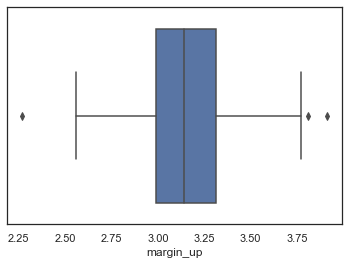

In [89]:
sns.boxplot(x=data['margin_up'] )

In [90]:
data =data.loc[(data['margin_up']>2.50) & (data['margin_up']<3.8)]

In [91]:
data_new= data.drop(['diagonal','length','height_right','height_left'],axis=1)
data_new.head()


,is_genuine,margin_low,margin_up
0,1,4.52,2.89
1,1,3.77,2.99
2,1,4.40,2.94
3,1,3.62,3.01
4,1,4.04,3.48


On relance la régression linéaire apres avoir supprimer les outliers.

In [92]:
reg_multi2 = smf.ols('margin_low~is_genuine+margin_up', data=data_new).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.24e-304
Time:                        12:50:00   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

# Vérification des hypothèses du modéle.

### 1. Les résidus du modéle

In [93]:
# les résidus du modéle (Valeur observée - Valeur ajustée)
data_new['residu_s'] = reg_multi2.resid

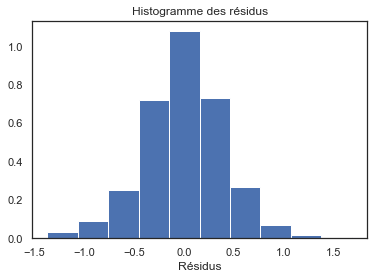

In [94]:
plt.hist(data_new['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L'allure de l'histogramme est assez classique : centrée et à peu près symétrique. Elle indique à quel point les valeurs prédites du modèle sont proches des valeurs réelles.

In [95]:
res_moy = reg_multi2.resid.mean()
print(res_moy)

-6.8353237833908264e-15


la moyenne des résidus est présque nulle, donc modèle a été correctement ajusté pour capturer la tendance générale dans les données. 

### 2. Vérifier la colinéarité des variables


In [96]:
variables = reg_multi2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5944720206720866, 1.5944720206720877]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### 3. Testez l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [97]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi2.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.604530319867901e-36


La p-value(p = 3.604530319867901e-36) qui est extrêmement proche de zéro, suggère qu'on peut rejeter l'hypothèse nulle.Cela signifie que l'hétéroscédasticité est présente dans les résidus du modèle de régression. 

### 4.  Testez la normalité des résidus

In [98]:
# Test de normalité Shapiro-Wilk
shapiro_test_statistic, shapiro_p_value = stats.shapiro(reg_multi2.resid)

# Afficher les résultats du test
print(f"Test de Shapiro-Wilk - Statistique de test : {shapiro_test_statistic}")
print(f"Test de Shapiro-Wilk - P-valeur : {shapiro_p_value}")

# Interprétation des résultats
if shapiro_p_value > 0.05:
    print("Les résidus suivent une distribution normale (p > 0.05)")
else:
    print("Les résidus ne suivent pas une distribution normale (p <= 0.05)")


Test de Shapiro-Wilk - Statistique de test : 0.9934729933738708
Test de Shapiro-Wilk - P-valeur : 4.8395763769804034e-06
Les résidus ne suivent pas une distribution normale (p <= 0.05)


Ici, l'hypothèse de normalité est remise en cause (p-value < 0.05).


## Résumé vérification des hypothèses du modéle :

La multicolinéarité est vérifiée, mais  les violations de la normalité et de l'homoscédasticité des résidus peuvent remettre en question l'utilisation directe de la régression linéaire.

Néanmoins, l'observation des residus, le fait qu'il ne soit pas très differents d'une distribution symétrique , et le fait que l'echantillon soit de taille suffisante (superieur à 30) permettent de dire que :

les résultats obtenus par le model linéaire ne sont pas absurdes, même si les resisdus ne sont pas considerés comme étant normaux


## Prédictions

In [99]:
# Valeurs prédictions
predictions=margin_fail.drop(['diagonal','height_left','height_right','length'],axis=1)

val_predictions=reg_multi2.predict(predictions)
margin_fail['margin_low_predictions']=val_predictions

In [100]:
margin_fail.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low_predictions
72,1,171.94,103.89,103.45,3.25,112.79,4.074443
99,1,171.93,104.07,104.18,3.14,113.08,4.097210
151,1,172.07,103.80,104.38,3.02,112.93,4.122047
197,1,171.45,103.66,103.80,3.62,113.27,3.997862
241,1,171.83,104.14,104.06,3.02,112.36,4.122047


# Application du modèle:

In [101]:
df_final = df.copy()
df_final.loc[margin_fail.index, 'margin_low'] = margin_fail['margin_low_predictions']
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [102]:
df_final.shape

(1500, 7)

In [103]:
df_final.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Analyse descriptive aprés regression linéaire multiple

In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [105]:
df_final.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482838,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659847,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


l'ecart type des variables length et margin_low sont plus important que les autres variables.

In [106]:
pourcentage_billet = df_final[['is_genuine']].value_counts()
print(pourcentage_billet)

is_genuine
1             1000
0              500
dtype: int64


Text(0.5, 1.0, ' vrais et faux billets')

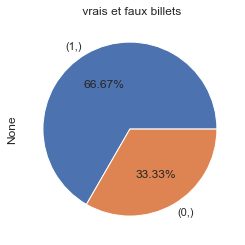

In [107]:
df_final[['is_genuine']].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')
plt.title(' vrais et faux billets')

In [108]:
display(df_final.groupby(["is_genuine"]).mean())

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
0,171.90116,104.19034,104.14362,5.216195,3.35016,111.63064
1,171.98708,103.94913,103.80865,4.116160,3.05213,113.20243


In [109]:
# Calcul des différences en pourcentage entre les vrais et les faux billets
ecart_diag = (((df_final.loc[df_final["is_genuine"] == 1]["diagonal"].mean())
               - (df_final.loc[df_final["is_genuine"] == 0]["diagonal"].mean()))
              /(df_final.loc[df_final["is_genuine"] == 1]["diagonal"].mean())) * 100

ecart_hight_left = (((df_final.loc[df_final["is_genuine"] == 1]["height_left"].mean())
                     -(df_final.loc[df_final["is_genuine"] == 0]["height_left"].mean())) 
                    /(df_final.loc[df_final["is_genuine"] == 1]["height_left"].mean())) * 100

ecart_hight_right = (((df_final.loc[df_final["is_genuine"] == 1]["height_right"].mean()) 
                      - (df_final.loc[df_final["is_genuine"] == 0]["height_right"].mean()))
                     /(df_final.loc[df_final["is_genuine"] == 1]["height_right"].mean())) * 100

ecart_margin_low = (((df_final.loc[df_final["is_genuine"] == 1]["margin_low"].mean())
                     - (df_final.loc[df_final["is_genuine"] == 0]["margin_low"].mean()))
                     /(df_final.loc[df_final["is_genuine"] == 1]["margin_low"].mean())) * 100

ecart_margin_up = (((df_final.loc[df_final["is_genuine"] == 1]["margin_up"].mean()) 
                    - (df_final.loc[df_final["is_genuine"] == 0]["margin_up"].mean()))
                   /(df_final.loc[df_final["is_genuine"] == 1]["margin_up"].mean())) * 100

ecart_length = (((df_final.loc[df_final["is_genuine"] == 1]["length"].mean())
                 -(df_final.loc[df["is_genuine"] == 0]["length"].mean()))
                /(df_final.loc[df_final["is_genuine"] == 1]["length"].mean())) * 100

# Création d'un DataFrame pour afficher les résultats
result_df = pd.DataFrame(data={"diagonale": ecart_diag,
                               "height_left": ecart_hight_left,
                               "height_right": ecart_hight_right,
                               "margin_low": ecart_margin_low,
                               "margin_up": ecart_margin_up,
                               "length": ecart_length}, index=["Moyenne des écarts en %"]).T

display(result_df)


,Moyenne des écarts en %
diagonale,0.049957
height_left,-0.232046
height_right,-0.322680
margin_low,-26.724787
margin_up,-9.764656
length,1.388477


- Les vrais billets ont une diagonale et une longueur plus importantes que les faux billets.
- Les faux billets ont des hauteurs et des marges plus importante que les vrais billets.


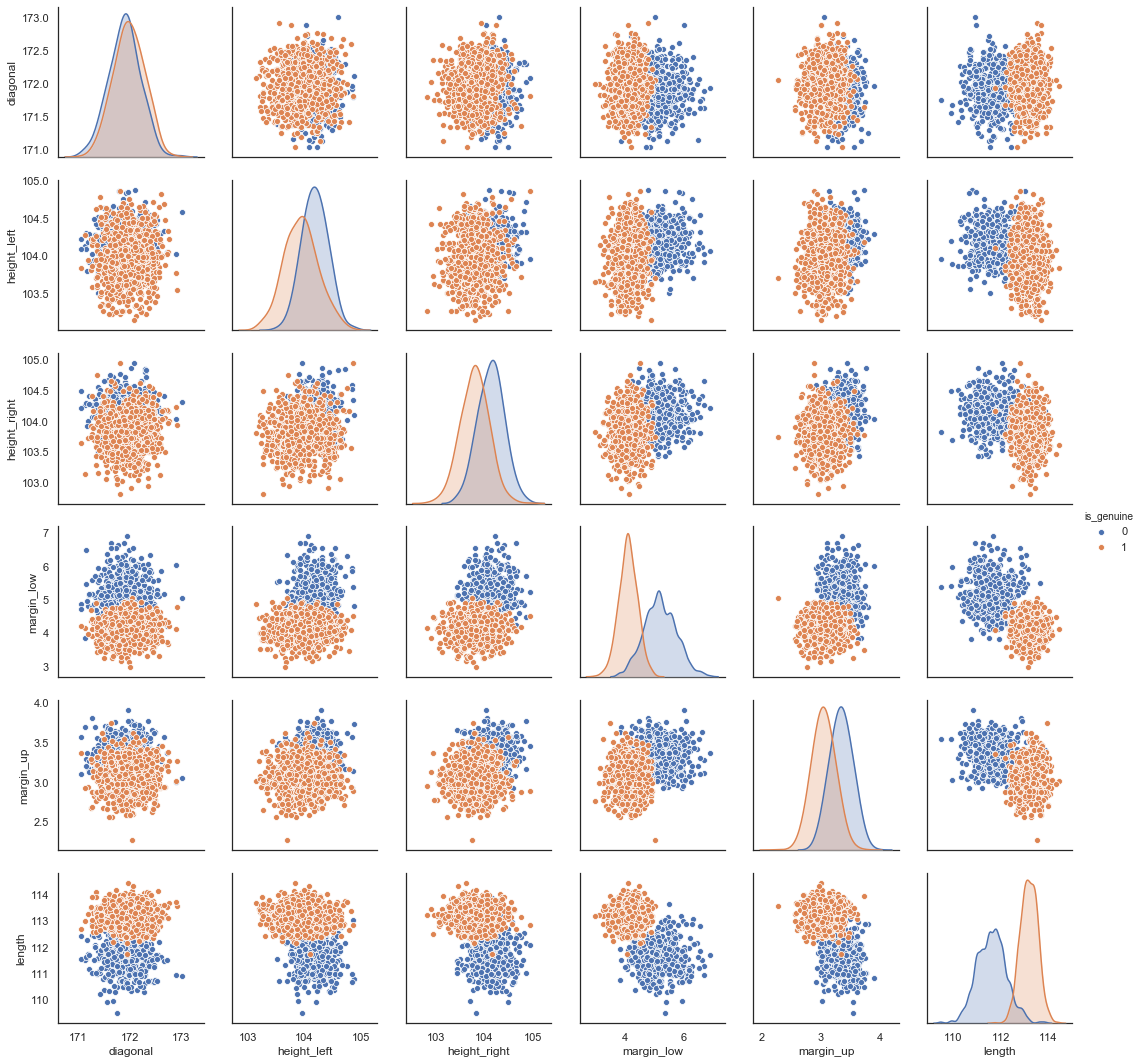

In [110]:
# Spécifiez la largeur de bande du noyau (bandwidth) manuellement
sns.set(style="white")
sns.pairplot(df_final, hue="is_genuine", diag_kind="kde", vars=["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"], diag_kws={'bw': 0.1})

plt.savefig("box_plot_apres_regression.png")
plt.show()

On observe que les differences des variables margin_low et length entre is_genuine = 1 en orange et is_genuine = 0 en bleu  sont les deux observations les plus marquées.

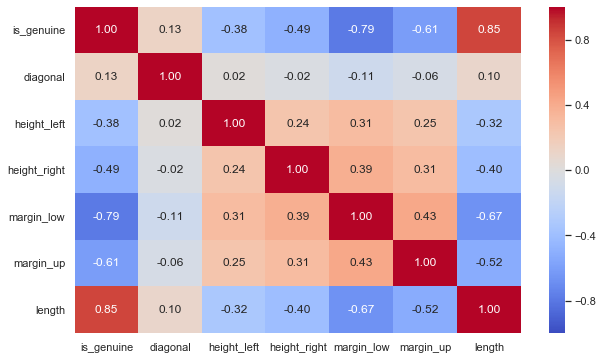

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

- is_genuine est très fortement correlé à length (0.85)
- is_genuine est très fortement inversement correlé à margin_low (-0.79)

# Régression logistique

## Modélisation et inspection des résultats

### Ajouter une constante à la matrice de données

In [112]:
# Creation de X et y:
X1 = df_final.drop("is_genuine", axis=1)
y1 = df_final["is_genuine"]

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X1, y1)

# Ajoutez une constante à la matrice X pour le terme d'interception
X_train = sm.add_constant(X_train)



### Modélisation Logit

In [113]:
# Créez un modèle de régression logistique

model1 = sm.Logit(y_train, X_train)
# Ajustez le modèle aux données d'entraînement
reg_log = model1.fit()

reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.019851
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1118
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.9689
Time:                        12:50:18   Log-Likelihood:                -22.332
converged:                       True   LL-Null:                       -718.82
Covariance Type:            nonrobust   LLR p-value:                8.047e-298
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -537.0123    374.458     -1.434      0.152   -1270.937     196.912
diagonal         1.0885      1.643      0.662      0.508      -2.132       4.309
height_left     -0.3142      1.649     -0.190      0.849      -3.547       2.919
height_right    -3.6933      1.888     -1.956      0.050      -7.393       0.007
margin_low      -6.6103      1.390     -4.757      0.000      -9.334      -3.887
margin_up      -14.1557      3.478     -4.070      0.000     -20.973      -7.339
length           7.4797      1.474      5.075      0.000       4.591      10.369
================================================================================

Possibly complete quasi-separation: A fraction 0.66 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Les variables diagonal et height_left sont non-significatives au seuil alpha 5 %.
On va enlever ces variables  et recommencer la régression sans ces variables. 

In [114]:

# Séparez les données en ensembles d'entraînement et de test
X2 = df_final[["height_right", "margin_low", "margin_up", "length"]]
y2 = df_final["is_genuine"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2)


# Ajoutez une constante à la matrice X pour le terme d'interception
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

# Ajustez le modèle
model2 = sm.Logit(y_train1, X_train1)
reg_log1 = model2.fit()

reg_log1.summary()


Optimization terminated successfully.
         Current function value: 0.031819
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.9503
Time:                        12:50:18   Log-Likelihood:                -35.797
converged:                       True   LL-Null:                       -720.83
Covariance Type:            nonrobust   LLR p-value:                2.133e-295
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -274.5700    159.546     -1.721      0.085    -587.275      38.135
height_right    -2.9160      1.255     -2.324      0.020      -5.375      -0.457
margin_low      -5.7025      0.962     -5.929      0.000      -7.588      -3.817
margin_up      -10.4067      2.389     -4.357      0.000     -15.089      -5.725
length           5.6630      0.925      6.123      0.000       3.850       7.476
================================================================================

Possibly complete quasi-separation: A fraction 0.47 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [115]:
import pickle
pickle.dump(reg_log1, open('model_regression_log.pkl', 'wb'))

In [116]:
#Voici les coefficients estimés
print(reg_log1.params)

const          -274.570036
height_right     -2.915988
margin_low       -5.702461
margin_up       -10.406735
length            5.662988
dtype: float64


### Application du modèle

In [117]:
#  Application du modele sur les donnees training:
y_prob = reg_log1.predict(X_test1)
y_pred = (y_prob > 0.5).astype(int)

### Évaluation du modèle à l'aide de la matrice de confusion.

In [118]:
# Créez la matrice de confusion
confusion = reg_log1.pred_table()

# Convertissez la matrice de confusion en DataFrame pour une meilleure visualisation
confusion_df = pd.DataFrame(confusion, columns=["Négatif prédit ", "Positif prédit"], index=["Négatif réel", "Positif réel"])

# Affichez la matrice de confusion
print("Matrice de confusion :")
print(confusion_df)


Matrice de confusion :
              Négatif prédit   Positif prédit
Négatif réel            374.0             8.0
Positif réel              2.0           741.0


Les coefficients sur la diagonale indiquent les éléments bien classés, les coefficients en dehors indiquent ceux que le classifieur a mis dans la mauvaise classe.

Il y a 374 observations qui étaient réellement de la classe "Négatif" et que le modèle a correctement prédites comme telles.

Il y a 8 observations qui étaient réellement de la classe "Négatif" mais que le modèle a incorrectement prédites comme "Positif".

Il y a 2 observations qui étaient réellement de la classe "Positif" mais que le modèle a incorrectement prédites comme "Négatif".

Il y a 741 observations qui étaient réellement de la classe "Positif" et que le modèle a correctement prédites comme telles.

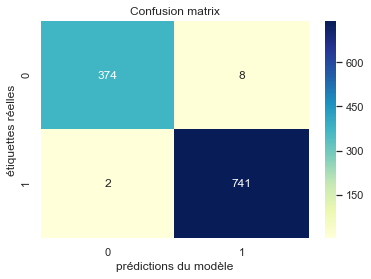

In [142]:
#Représentation graphique de la Matrice de confusion
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix')
plt.ylabel('étiquettes réelles')
plt.xlabel('prédictions du modèle')

plt.show()

In [120]:
# Calculer la précision en comparant les prédictions aux vraies étiquettes
accuracy = accuracy_score(y_test1, y_pred)

# Calculer la précision en comparant les prédictions aux vraies étiquettes positives
precision = precision_score(y_test1, y_pred)

# Calculer le rappel en comparant les vrais positifs aux vraies étiquettes positives
recall = recall_score(y_test1, y_pred)

# Calculer le F1-score
f1 = f1_score(y_test1, y_pred)

results = pd.DataFrame({
    'Métrique': ['Accuracy', 'Précision', 'Rappel (Recall)', 'F1-score'],
    'Score': [accuracy, precision, recall, f1]
})

print(results)

          Métrique     Score
0         Accuracy  0.997333
1        Précision  1.000000
2  Rappel (Recall)  0.996109
3         F1-score  0.998051


Ce modèle est quasiment parfait puisque tous les scores s'approchent de 1. 

In [121]:
# Odds Ratios:
print("Les Odds ratio sont:\n", np.exp(reg_log1.params))

Les Odds ratio sont:
 const           5.698340e-120
height_right     5.415051e-02
margin_low       3.337742e-03
margin_up        3.022822e-05
length           2.880079e+02
dtype: float64


### L'évaluation du modèle peut aussi se faire par la courbe ROC et sa métrique AUC.

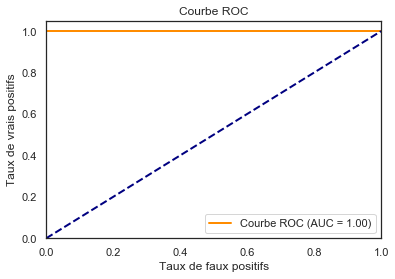

In [122]:
# Calculez la courbe ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_prob)

#Mesure AUC (Area Under the Curve): Aire sous la courbe
roc_auc = auc(false_positive_rate, true_positive_rate)



# Tracez la courbe ROC
plt.figure()
plt.plot(false_positive_rate, true_positive_rate,color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()



On a un modèle quasiment parfait avec une aire sous la courbe approximée à 1.

# K-means:

On choisit naturellement un k=2.

In [123]:
df_km =df_final.copy()
df_km.index = df['is_genuine']
del df_km['is_genuine']

df_km.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
1,172.69,104.48,103.50,4.40,2.94,113.16
1,171.36,103.91,103.94,3.62,3.01,113.51
1,171.73,104.28,103.46,4.04,3.48,112.54


In [124]:
#Transformation des données en array Numpy
X = df_km.values

#Centrage/réduction des données 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [125]:
# Créez un modèle K-Means par apprentissage non-supervisé avec 2 clusters
model3 = cluster.KMeans(n_clusters=2)
model3.fit(X_scaled)

# Prédisez les clusters pour chaque point de données dans X_scaled
labels = model3.labels_

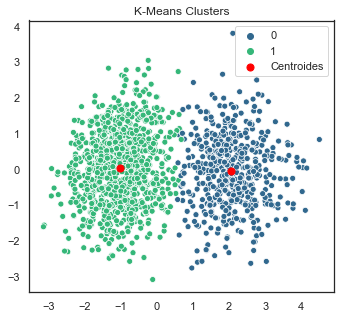

In [126]:
# Effectuez une Analyse en Composantes Principales (PCA) sur vos données
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled représente vos données mises à l'échelle


# Graphiques de dispersion des centroides projetés
plt.figure(figsize=(12, 5))


# On récupère les controides du kmeans et on calcul leurs coordonnées sur F1 et F2
centroids = model3.cluster_centers_
centroids_proj = pca.transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns=["F1", "F2"], 
                              index=["cluster_0", "cluster_1"])
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", legend="full")
plt.scatter(centroids_proj["F1"], centroids_proj["F2"], marker='o', s=50, c='red', label='Centroides')
plt.title("K-Means Clusters")


plt.legend()
plt.show()


In [127]:
#Tableau des Centroïdes 2 clusters dans sa version centrée réduite
df_centroids = pd.DataFrame(centroids, 
                              columns = df_km.columns, 
                              index=["0", "1"])
df_centroids

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.194323,0.570713,0.713365,1.120135,0.864176,-1.200833
1,0.096000,-0.281946,-0.352419,-0.553373,-0.426924,0.593240


In [128]:
#Intégration des clusters dans notre dataframe 
df_model = pd.DataFrame(model3.fit_predict(X), columns=['cluster'])
df_model = pd.concat([df_model, df_final], axis=1)
df_model

,cluster,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...,...
1495,0,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,0,172.06,104.28,104.06,5.17,3.46,112.25


In [129]:
#Verrfication de la classification: Matrice de confusion:
kmeans_matrix = pd.crosstab(labels,df_model["is_genuine"])
print(kmeans_matrix)

is_genuine    0    1
row_0               
0           486   10
1            14  990


La matrice de confusion que vous avez affichée montre la correspondance entre les clusters attribués par K-Means et les véritables classes (False et True). Voici comment l'interpréter :

Pour le cluster 0, il y a 486 échantillons qui appartiennent à la classe réelle 0 (0 négatifs) et 10 échantillons qui appartiennent à la classe réelle 1 (1 positif).

Pour le cluster 1, il y a 14 échantillons qui appartiennent à la classe réelle 0 (0 négatifs) et 990 échantillons qui appartiennent à la classe réelle 1 (1 positif).

Cela signifie que le cluster 0 est principalement composé d'échantillons de la classe réelle 0 (négatifs), tandis que le cluster 1 est principalement composé d'échantillons de la classe réelle 1 (positifs).

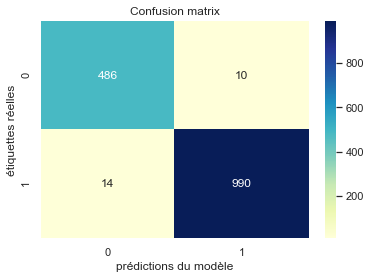

In [130]:
#Représentation graphique de la Matrice de confusion
sns.heatmap(pd.DataFrame(kmeans_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix')
plt.ylabel('étiquettes réelles')
plt.xlabel('prédictions du modèle')

plt.show()

D'aprés les resultats , on va choisir la regression logitique pour la prediction des billets. En effet cet alhorithme donne les meilleurs resulats sur l'echantillon testé . De maniere générale les modéles basant sur une apprentissage supervisée sont souvent plus performant et plus facile à interpreter.

## Application final

In [131]:

test_csv = 'billets_production.csv'

In [132]:
test_csv

'billets_production.csv'

In [133]:
df_test = pd.read_csv(test_csv)
df_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [140]:

#Fonction "detecteur_billet()" à utiliser dans l'étape suivante
def detecteur_billet(test_csv):
    
    #Chargement du modèle pré-entraîné    
    picked_model=pickle.load(open('model_regression_log.pkl', 'rb'))
    
    #Lecture des données de test :                       
    df_test = pd.read_csv(test_csv)
    X1 = df_test.copy()
    #Sélection des colonnes qui contiennent les caractéristiques des billets qui seront utilisées pour la prédiction.:
    X1 = X1[["height_right","margin_low","margin_up","length"]]
    X1 = sm.add_constant(X1)
    
    
    # Prédiction des résultats : 
    y_prediction = picked_model.predict(X1)
    
    # Calcul des probabilités des billets :
    probalite = pd.Series(y_prediction, name='proba')
    
    # Intégration des probabilités dans le jeu de données
    df_final_test = pd.concat([df_test, probalite], axis=1)
    
    # Classification des résultats , selon une probabilité  supérieure ou égale à 0.5 :
    resultat = []
    for proba in df_final_test['proba']:
        rounded_proba = round(proba, 6)  # Arrondir à deux décimales
        if rounded_proba >= 0.5:
            resultat.append('Vrai Billet')
        else:
            resultat.append('Faux Billet')


    df_final_test['resultat'] = resultat

    return df_final_test

In [141]:
prediction=detecteur_billet("billets_production.csv")
prediction

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba,resultat
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.000070,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.000006,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.000025,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.995389,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.999981,Vrai Billet
